## Flow of the Project:
1. Get data from [Understat](https://understat.com/) for Messi and Ronaldo
3. Data Cleaning and Exploration of the data for Messi and Ronaldo on different aspects
2. Comparative Analysis
3. Shot Analysis
3. The Final comparison

In [ ]:
#import required libraries
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler

#plotting libraries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots

## Getting the Data


### Cristiano Ronaldo

#### Season-wise Data

In [ ]:
#scraping Cristiano's player stats:
cris_scrape_url = "https://understat.com/player/2371"
page_connect = urlopen(cris_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind : stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
cris_season_wise_meta_df.insert(0, "Player", "Cristiano")

In [ ]:
cris_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,33,29,167,2807,29.83808070421219,3,3.8546393513679504,36,2020,Juventus,3,0,23,23.74781009554863,28.635406404733658,8.915717896074057
1,Cristiano,FWL,33,31,208,2920,29.431679474189878,5,6.067225832492113,51,2019,Juventus,3,0,19,19.53495633788407,26.5536093339324,7.224641568958759
2,Cristiano,FW,31,21,175,2692,23.32403990253806,8,5.193873833864927,48,2018,Juventus,3,0,16,18.75628685578704,21.854169853031635,7.177339139394462
3,Cristiano,FW,27,26,178,2304,26.999303579330444,5,5.524841643869877,40,2017,Real Madrid,1,0,23,24.02619305253029,31.62383733689785,9.47185287065804
4,Cristiano,FWL,29,25,162,2546,25.413737758994102,6,4.591035931371152,31,2016,Real Madrid,4,0,19,19.467644795775414,29.57457834482193,8.661094894632697
5,Cristiano,AML,36,35,227,3186,35.58900645375252,11,8.606404347345233,51,2015,Real Madrid,3,0,29,28.899507626891136,40.81802845001221,9.863004602491856
6,Cristiano,FWL,35,48,225,3103,39.30876067932695,16,13.600642347708344,76,2014,Real Madrid,5,1,38,30.389685845933855,43.60801999177784,7.5202372539788485


#### Shots Data

In [ ]:
#scrape cristiano shots data
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind : stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_shots_df = pd.json_normalize(json.loads(json_data))
cris_shots_df.insert(0, "Player", "Cristiano")

In [ ]:
cris_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,Cristiano,421362,41,SavedShot,0.8059999847412109,0.7019999694824218,0.034178029745817184,Cristiano Ronaldo,a,2371,OpenPlay,2020,RightFoot,15779,Sassuolo,Juventus,1,3,2021-05-12 18:45:00,None,BallRecovery
1338,Cristiano,421363,44,Goal,0.8719999694824219,0.4370000076293945,0.36698365211486816,Cristiano Ronaldo,a,2371,OpenPlay,2020,LeftFoot,15779,Sassuolo,Juventus,1,3,2021-05-12 18:45:00,Adrien Rabiot,TakeOn
1339,Cristiano,421374,77,ShotOnPost,0.86,0.715,0.05728159844875336,Cristiano Ronaldo,a,2371,OpenPlay,2020,RightFoot,15779,Sassuolo,Juventus,1,3,2021-05-12 18:45:00,Dejan Kulusevski,Pass
1340,Cristiano,422005,23,Goal,0.9390000152587891,0.5279999923706055,0.6015962958335876,Cristiano Ronaldo,h,2371,SetPiece,2020,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,None,Rebound


###Messi

#### Season-wise Data

In [ ]:
#scraping Messi's player stats:
messi_scrape_url = "https://understat.com/player/2097"
page_connect = urlopen(messi_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind : stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
messi_season_wise_meta_df.insert(0, "Player", "Messi")

In [ ]:
messi_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084
1,Messi,Sub,33,25,159,2876,20.84966728463769,20,16.593363385647535,88,2019,Barcelona,4,0,20,17.133279267698526,34.92346678301692,13.53765751607716
2,Messi,FW,34,36,170,2704,25.997169069945812,13,15.33516551926732,93,2018,Barcelona,3,0,32,22.28090887516737,38.45987746119499,10.69879900291562
3,Messi,FW,36,34,196,2995,28.946280613541603,12,15.100405622273684,87,2017,Barcelona,3,0,32,25.973170146346092,48.18063422292471,21.634404016658664
4,Messi,FWR,34,37,179,2832,26.885174363851547,9,13.955131396651268,79,2016,Barcelona,6,0,31,21.682230830192566,42.52504535019398,18.13351222872734
5,Messi,FWR,33,26,158,2726,27.101910315454006,16,15.871278138831258,77,2015,Barcelona,3,0,23,21.899351350963116,41.99686624109745,15.196364373899996
6,Messi,FW,38,43,187,3374,35.89176357910037,18,17.61195552162826,95,2014,Barcelona,4,0,38,31.432097773998976,54.75360991060734,19.75672373920679


#### Shots Data

In [ ]:
#scrape messi'sshots data
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind : stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_shots_df = pd.json_normalize(json.loads(json_data))
messi_shots_df.insert(0, "Player", "Messi")

In [ ]:
messi_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Messi,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,Messi,32525,41,Goal,0.8619999694824219,0.615,0.06870150566101074,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,Messi,32529,62,Goal,0.86,0.435,0.15034306049346924,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,Messi,32769,3,SavedShot,0.8180000305175781,0.38,0.045503295958042145,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,Messi,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531666964292526,Lionel Messi,a,2097,DirectFreekick,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Messi,422600,18,MissedShots,0.9519999694824218,0.6659999847412109,0.06496187299489975,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,Chipped
1240,Messi,422601,27,Goal,0.925,0.4370000076293945,0.3019910752773285,Lionel Messi,h,2097,OpenPlay,2020,Head,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped
1241,Messi,422604,41,BlockedShot,0.7659999847412109,0.42400001525878905,0.032836854457855225,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,TakeOn
1242,Messi,422612,84,SavedShot,0.8269999694824218,0.3970000076293945,0.05391271412372589,Lionel Messi,h,2097,SetPiece,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped


## Final Season-level & Shots Data

### Joint Season-wise Data

In [ ]:
season_wise_meta_df = cris_season_wise_meta_df.append(messi_season_wise_meta_df)
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,33,29,167,2807,29.83808070421219,3,3.8546393513679504,36,2020,Juventus,3,0,23,23.74781009554863,28.635406404733658,8.915717896074057
1,Cristiano,FWL,33,31,208,2920,29.431679474189878,5,6.067225832492113,51,2019,Juventus,3,0,19,19.53495633788407,26.5536093339324,7.224641568958759
2,Cristiano,FW,31,21,175,2692,23.32403990253806,8,5.193873833864927,48,2018,Juventus,3,0,16,18.75628685578704,21.854169853031635,7.177339139394462
3,Cristiano,FW,27,26,178,2304,26.999303579330444,5,5.524841643869877,40,2017,Real Madrid,1,0,23,24.02619305253029,31.62383733689785,9.47185287065804
4,Cristiano,FWL,29,25,162,2546,25.413737758994102,6,4.591035931371152,31,2016,Real Madrid,4,0,19,19.467644795775414,29.57457834482193,8.661094894632697
5,Cristiano,AML,36,35,227,3186,35.58900645375252,11,8.606404347345233,51,2015,Real Madrid,3,0,29,28.899507626891136,40.81802845001221,9.863004602491856
6,Cristiano,FWL,35,48,225,3103,39.30876067932695,16,13.600642347708344,76,2014,Real Madrid,5,1,38,30.389685845933855,43.60801999177784,7.5202372539788485
0,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084
1,Messi,Sub,33,25,159,2876,20.84966728463769,20,16.593363385647535,88,2019,Barcelona,4,0,20,17.133279267698526,34.92346678301692,13.53765751607716
2,Messi,FW,34,36,170,2704,25.997169069945812,13,15.33516551926732,93,2018,Barcelona,3,0,32,22.28090887516737,38.45987746119499,10.69879900291562


### Joint Shots Data

In [ ]:
shots_df = cris_shots_df.append(messi_shots_df)
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Messi,422600,18,MissedShots,0.9519999694824218,0.6659999847412109,0.06496187299489975,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,Chipped
1240,Messi,422601,27,Goal,0.925,0.4370000076293945,0.3019910752773285,Lionel Messi,h,2097,OpenPlay,2020,Head,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped
1241,Messi,422604,41,BlockedShot,0.7659999847412109,0.42400001525878905,0.032836854457855225,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,TakeOn
1242,Messi,422612,84,SavedShot,0.8269999694824218,0.3970000076293945,0.05391271412372589,Lionel Messi,h,2097,SetPiece,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped


In [ ]:
shots_df.describe()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
count,2586,2586,2586,2586,2586,2586,2586,2586,2586,2586,2586,2586,2586,2586,2586,2586,2586,2586,2586,1802,2586
unique,2,2586,97,5,309,509,2490,2,2,2,5,7,4,457,53,55,11,8,452,100,22
top,Cristiano,325109,50,MissedShots,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,4047,Barcelona,Barcelona,2,1,2015-05-17 18:00:00,Luis Suárez,Pass
freq,1342,1,41,751,114,105,67,1342,1459,1342,1848,412,1377,14,720,566,659,803,16,126,1033


## Data Cleaning & EDA

### On Season-wise Data

#### Numerical EDA

In [ ]:
season_wise_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 6
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      14 non-null     object
 1   position    14 non-null     object
 2   games       14 non-null     object
 3   goals       14 non-null     object
 4   shots       14 non-null     object
 5   time        14 non-null     object
 6   xG          14 non-null     object
 7   assists     14 non-null     object
 8   xA          14 non-null     object
 9   key_passes  14 non-null     object
 10  season      14 non-null     object
 11  team        14 non-null     object
 12  yellow      14 non-null     object
 13  red         14 non-null     object
 14  npg         14 non-null     object
 15  npxG        14 non-null     object
 16  xGChain     14 non-null     object
 17  xGBuildup   14 non-null     object
dtypes: object(18)
memory usage: 2.1+ KB


In [ ]:
season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

In [ ]:
season_wise_meta_df = season_wise_meta_df.round(2)

In [ ]:
season_wise_meta_df.describe().round(1)

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
count,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
mean,33.4,31.9,184.7,2863.0,28.7,10.8,11.0,66.4,2017.0,3.5,0.1,26.4,23.4,37.2,12.7
std,2.9,7.5,22.8,271.5,5.1,5.3,5.1,22.5,2.1,1.2,0.3,7.1,4.4,9.0,5.3
min,27.0,21.0,158.0,2304.0,20.8,3.0,3.8,31.0,2014.0,1.0,0.0,16.0,17.1,21.8,7.2
25%,33.0,26.0,167.8,2709.5,26.2,6.5,5.7,48.8,2015.2,3.0,0.0,20.8,20.1,30.1,8.7
50%,33.5,30.5,178.5,2854.0,27.0,10.0,12.5,76.5,2017.0,3.0,0.0,25.0,22.6,38.2,10.3
75%,35.0,35.8,195.8,3011.5,29.7,15.2,15.3,85.0,2018.8,4.0,0.0,31.8,25.5,42.4,17.4
max,38.0,48.0,227.0,3374.0,39.3,20.0,17.6,95.0,2020.0,6.0,1.0,38.0,31.4,54.8,21.6


In [ ]:
season_wise_meta_df.groupby(["Player"]).describe().round(1)

games                               ... xGBuildup                              
          count  mean  std   min   25%   50%  ...       std   min   25%   50%   75%   max
Player                                        ...                                        
Cristiano   7.0  32.0  3.2  27.0  30.0  33.0  ...       1.1   7.2   7.4   8.7   9.2   9.9
Messi       7.0  34.7  1.8  33.0  33.5  34.0  ...       4.0  10.7  14.4  18.1  20.0  21.6

[2 rows x 120 columns]

In [ ]:
season_wise_meta_df.groupby(["Player","team"])["goals"].sum()

Player     team       
Cristiano  Juventus        81
           Real Madrid    134
Messi      Barcelona      231
Name: goals, dtype: int64

#### Visual EDA

In [ ]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns

In [ ]:
num_cols

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [ ]:
num_cols.__len__()

15

In [ ]:
season_wise_meta_df.groupby(["Player"])[num_cols].sum()

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
Player,,,,,,,,,,,,,,,
Cristiano,224,215,1342,19558,209.90,54,47.43,333,14119,22,1,167,164.83,222.66,58.83
Messi,243,231,1244,20524,192.36,97,105.89,596,14119,27,0,203,163.35,298.75,119.30


In [ ]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

##### EDA on Totals(Conolidated Data for all seasons per player)

In [ ]:
i = j =1

#creating an empty subplot:
fig = make_subplots(rows = 4, cols = 4,
                    shared_xaxes = False,
                    vertical_spacing = 0.1,
                    subplot_titles = num_cols)

#Adding bar plot for goals conceded in all subplots:
for col in num_cols:
  fig.add_trace(go.Bar(x = total_df["Player"],
                       y = total_df[col],
                       text = total_df[col],
                       textposition = "inside",
                       name = col),
                row = i, col = j)
  j += 1
  if j>4:
    j = 1
    i+=1
  if i>4:
    i = 1
fig.update_layout(height = 800)
fig.show()

xGChain --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **INCLUDING** the final pass or the shot. \\
xGBuildup --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **EXCLUDING** the final pass or the shot. \\

##### EDA on Season-wise Stats (Consolidated data per season per player)

In [ ]:
i = j =1

#creating an empty subplot:
fig = make_subplots(rows = 4, cols = 4,
                    shared_xaxes = False,
                    vertical_spacing = 0.1,
                    subplot_titles = num_cols)

#Adding bar plot for goals conceded in all subplots:
for col in num_cols:
  fig.add_trace(go.Bar(x = season_wise_meta_df["season"],
                       y = season_wise_meta_df[col],
                       text = season_wise_meta_df[col],
                       textposition = "inside",
                       name = col),
                row = i, col = j)
  j += 1
  if j>4:
    j = 1
    i+=1
  if i>4:
    i = 1
fig.update_layout(height = 800, barmode = "stack")
fig.show()

## On Shots Data

### Numerical EDA

In [ ]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2586 entries, 0 to 1243
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           2586 non-null   object
 1   id               2586 non-null   object
 2   minute           2586 non-null   object
 3   result           2586 non-null   object
 4   X                2586 non-null   object
 5   Y                2586 non-null   object
 6   xG               2586 non-null   object
 7   player           2586 non-null   object
 8   h_a              2586 non-null   object
 9   player_id        2586 non-null   object
 10  situation        2586 non-null   object
 11  season           2586 non-null   object
 12  shotType         2586 non-null   object
 13  match_id         2586 non-null   object
 14  h_team           2586 non-null   object
 15  a_team           2586 non-null   object
 16  h_goals          2586 non-null   object
 17  a_goals          2586 non-null   

In [ ]:
shots_df = shots_df.apply(pd.to_numeric, errors = "ignore")

In [ ]:
shots_df = shots_df.round(2)

In [ ]:
shots_df.describe().round(1)

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,2586.0,2586.0,2586.0,2586.0,2586.0,2586.0,2586.0,2586.0,2586.0,2586.0
mean,205495.8,48.3,0.8,0.5,0.2,2239.2,2016.9,8016.3,2.1,1.5
std,127463.6,26.3,0.1,0.1,0.2,136.9,2.0,4594.9,1.8,1.5
min,32522.0,0.0,0.5,0.0,0.0,2097.0,2014.0,1404.0,0.0,0.0
25%,89634.5,26.0,0.8,0.4,0.0,2097.0,2015.0,4005.0,1.0,0.0
50%,179977.0,49.0,0.9,0.5,0.1,2371.0,2017.0,8025.0,2.0,1.0
75%,331044.5,70.0,0.9,0.6,0.1,2371.0,2019.0,12251.0,3.0,2.0
max,422618.0,96.0,1.0,0.9,1.0,2371.0,2020.0,15790.0,10.0,8.0


In [ ]:
shots_df.groupby(["Player"]).describe().round(1)

id                               ... a_goals               
            count      mean       std      min  ...     25%  50%  75%  max
Player                                          ...                       
Cristiano  1342.0  200362.4  127488.2  32535.0  ...     0.0  1.0  2.0  8.0
Messi      1244.0  211033.6  127256.3  32522.0  ...     0.0  1.0  2.0  8.0

[2 rows x 80 columns]

In [ ]:
shots_df.groupby(["Player", "season"]).describe().round(1)

id                               ... a_goals               
                  count      mean      std       min  ...     25%  50%  75%  max
Player    season                                      ...                       
Cristiano 2014    225.0   36881.2   2463.9   32535.0  ...     0.0  1.0  3.0  8.0
          2015    227.0   88168.0   2551.5   84143.0  ...     0.0  1.0  2.0  6.0
          2016    162.0  139491.1   2283.4  135551.0  ...     1.0  1.0  3.0  6.0
          2017    178.0  187163.3  14737.9  170066.0  ...     1.0  1.0  2.0  5.0
          2018    175.0  254120.5  24295.8  218143.0  ...     0.5  1.0  2.0  3.0
          2019    208.0  350835.7  20444.8  312656.0  ...     0.0  1.0  2.0  3.0
          2020    167.0  402493.4  11968.5  378309.0  ...     0.0  1.0  2.0  4.0
Messi     2014    187.0   36952.0   2531.3   32522.0  ...     0.0  1.0  2.0  8.0
          2015    158.0   88863.3   2656.8   84059.0  ...     0.0  1.0  2.0  8.0
          2016    179.0  139806.3   2646.0  135275.0  ...     1.0  2.0  2.0  6.0
          2017    196.0  185971.0  15797.6  169196.0  ...     0.0  1.0  2.0  5.0
          2018    170.0  268467.5  24721.2  218406.0  ...     0.0  1.0  2.0  5.0
          2019    159.0  353540.5  15654.1  320830.0  ...     0.0  1.0  2.0  5.0
          2020    195.0  401267.9  12859.0  379833.0  ...     1.0  1.0  2.0  6.0

[14 rows x 72 columns]

### Visual EDA

#### EDA on Totals

In [ ]:
shots_df.head()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.84,0.50,0.07,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.77,0.62,0.03,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.71,0.67,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.82,0.24,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.88,0.50,0.74,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard


In [ ]:
px.histogram(data_frame=shots_df, x = "result", color="Player",
             barmode = "group", title = "Shot Result Comparison",
             labels = {"result":"","count":""})

In [ ]:
px.histogram(data_frame=shots_df, x = "situation", color="Player",
             barmode = "group", title = "Shot Play-pattern Comparison",
             labels = {"situation":"","count":""})

In [ ]:
px.histogram(data_frame=shots_df, x="player_assisted", color="Player",
             barmode="group", title="Assisting Player Comparison",
             labels={"result": "", "count": ""})

Interesting to note that both players have had a fruitful relationship with their respective left-backs!

In [ ]:
px.histogram(data_frame=shots_df, x="h_a", color="Player",
             barmode="group", title="Home-Away Shots Comparison",
             labels={"result": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df[shots_df["result"] == "Goal"],
             x="h_a", color="Player",
             barmode="group", title="Home-Away Goals Comparison",
             labels={"result": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df[shots_df["result"] == "MissedShots"], 
             x="h_a", color="Player",
             barmode="group", title="Home-Away Missed Shots Comparison",
             labels={"result": "", "count": ""})

## Comparative Analysis

### Goals vs Shots (per season)

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 size="npg", opacity=.8)
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=600, width=1200)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", size="npg",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

### Total Goals vs Non-penalty Goals (per season)

In [ ]:
fig = px.scatter(y="goals", x="npg", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].min(), season_wise_meta_df["npg"].max() + 5],
                         y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()],
                         name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].mean(), season_wise_meta_df["npg"].mean()],
                         y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5],
                         name="Avg. npg"))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

### Total Goals vs Expected Goals (per season)

In [ ]:
fig = px.scatter(y="xG", x="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5],
                         y=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5]))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

### Toatl Goals vs Total Assits (per season)

In [ ]:
fig = px.scatter(y="assists", x="goals", data_frame=season_wise_meta_df,
                 hover_name="season", text="Player", symbol="season",
                 opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["goals"],
                         y=[season_wise_meta_df["assists"].mean()]*len(season_wise_meta_df),
                         name="Avg. Assists",
                         marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["goals"].mean()]*len(season_wise_meta_df),
                         y=season_wise_meta_df["assists"],
                         name="Avg. Goals",
                         marker={"size": .1}))
fig.update_traces(textposition='top center',
                  textfont_size=10,
                  marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

### Total Expected Goals (xG) vs Total Expected Assists (xA) 

In [ ]:
fig = px.scatter(y="xA", x="xG", data_frame=season_wise_meta_df, hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xG"],
                         y=[season_wise_meta_df["xA"].mean()]*len(season_wise_meta_df),
                         name = "Avg. xA",
                         marker={"size":.1}))
fig.add_trace(go.Scatter(y=season_wise_meta_df["xA"],
                         x=[season_wise_meta_df["xG"].mean()]*len(season_wise_meta_df),
                         name = "Avg. xG",
                         marker={"size":.1}))
fig.update_traces(textposition='top center',
                 textfont_size=10,
                 marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

### Total xGChain vs Total xGBuildup

In [ ]:
fig = px.scatter(x="xGChain", y="xGBuildup", data_frame=season_wise_meta_df, hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xGChain"],
                         y=[season_wise_meta_df["xGBuildup"].mean()]*len(season_wise_meta_df),
                         name = "Avg. xGBuildup",
                         marker={"size":.1}))
fig.add_trace(go.Scatter(y=season_wise_meta_df["xGBuildup"],
                         x=[season_wise_meta_df["xGChain"].mean()]*len(season_wise_meta_df),
                         name = "Avg. xGChain",
                         marker={"size":.1}))
fig.update_traces(textposition='top center',
                 textfont_size=10,
                 marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Shot Analysis

### for Pitch Map

In [ ]:
#setting boundaries and midpoint
x_lims = [0, 1.15]
y_lims = [0,0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

#color and linewidth
background_color = "black"
line_color = "white"
line_width = 2

In [ ]:
#@title
def create_full_pitch(x_lims, y_lims, background_color="white", line_color="black", line_width=2.):
    """
    Function to create a full-scale pitch based on input dimensions
    :params:
    x_lims: min and max limits for the length of the field
    y_lims: min and max limits for the width/breadth of the field
    background_color: Background color of the field
    line_color: Color for all the lines in the field (Keep this color in contrast with background_color for optimal visual results)
    line_width: The thickness of the outer and center lines
    """
    # Create figure:
    fig = plt.figure(facecolor=background_color, figsize=(12, 7))
    ax = fig.add_subplot(111, facecolor=background_color)

    # Pitch Outline & Centre Line
    plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
    plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
    plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
    plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
    plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

    # Left Penalty Area
    plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

    # Right Penalty Area
    plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

    # Left 6yd box Area
    plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

    # # Right 6yd box Area
    plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

    # Prepare Circles
    centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
    centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
    left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
    right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    # Prepare Arcs
    left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
    right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    plt.axis("off")

    return ax

### Plot Shot-maps

In [ ]:
shots_df["X"] = shots_df["X"].multiply(x_lims[1])
shots_df["Y"] = shots_df["Y"].multiply(y_lims[1])

(0.0, 0.74)

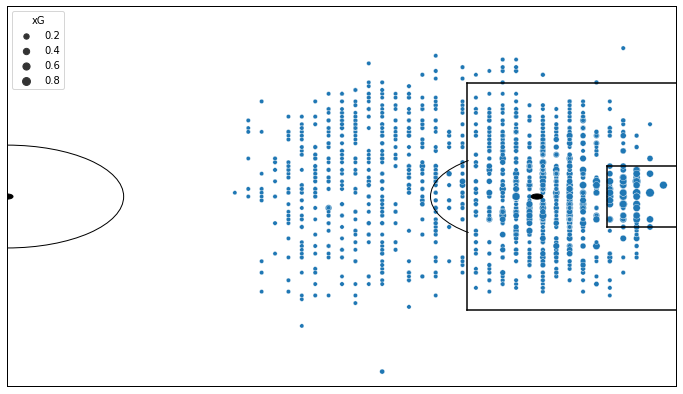

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Cristiano"], size="xG", ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

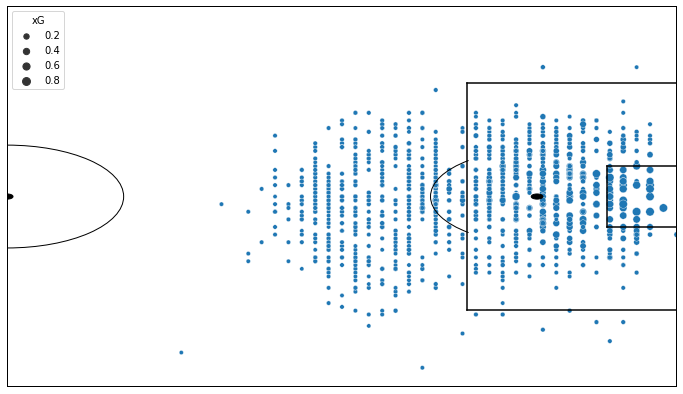

In [ ]:
ax2 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], size="xG", ax=ax2)

ax2.set_xlim([x_mid, x_lims[1]])
ax2.set_ylim(y_lims)

### Plot HeatMaps

(0.0, 0.74)

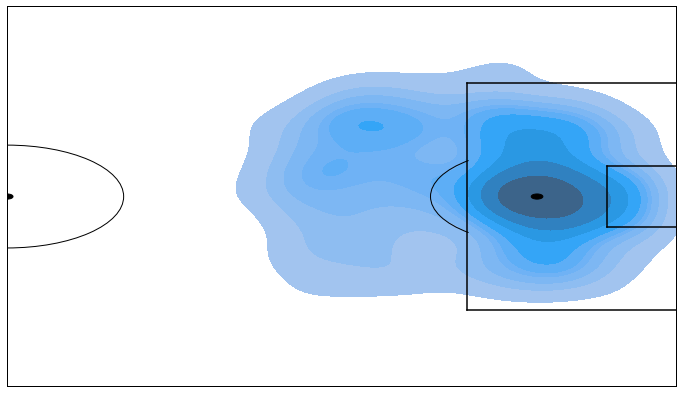

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Cristiano"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

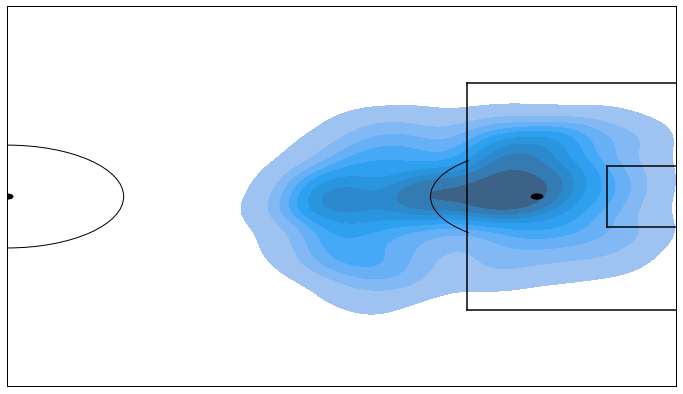

In [ ]:
ax2 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], shade=True, n_levels=10, ax=ax2)

ax2.set_xlim([x_mid, x_lims[1]])
ax2.set_ylim(y_lims)

## The Final Comparison

In [ ]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92
1,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22
2,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18
3,Cristiano,FW,27,26,178,2304,27.00,5,5.52,40,2017,Real Madrid,1,0,23,24.03,31.62,9.47
4,Cristiano,FWL,29,25,162,2546,25.41,6,4.59,31,2016,Real Madrid,4,0,19,19.47,29.57,8.66
5,Cristiano,AML,36,35,227,3186,35.59,11,8.61,51,2015,Real Madrid,3,0,29,28.90,40.82,9.86
6,Cristiano,FWL,35,48,225,3103,39.31,16,13.60,76,2014,Real Madrid,5,1,38,30.39,43.61,7.52
0,Messi,FW,35,30,195,3017,26.68,9,11.42,77,2020,Barcelona,4,0,27,22.96,37.91,20.34
1,Messi,Sub,33,25,159,2876,20.85,20,16.59,88,2019,Barcelona,4,0,20,17.13,34.92,13.54
2,Messi,FW,34,36,170,2704,26.00,13,15.34,93,2018,Barcelona,3,0,32,22.28,38.46,10.70


In [ ]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()

In [ ]:
radar_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,224,215,1342,19558,209.90,54,47.43,333,14119,22,1,167,164.83,222.66,58.83
1,Messi,243,231,1244,20524,192.36,97,105.89,596,14119,27,0,203,163.35,298.75,119.30


In [ ]:
radar_df.columns

Index(['Player', 'games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA',
       'key_passes', 'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain',
       'xGBuildup'],
      dtype='object')

In [ ]:
cols_for_radar = ['goals', 'shots', 'xG',
                  'assists', 'xA', 'key_passes',
                  'npg', 'npxG', 'xGChain', 'xGBuildup']

### Radar Plot for Comparison Analysis

In [ ]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].values.flatten(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()

### Per90 Stats

In [ ]:
per90Cols = ['goals', 'shots', 'xG',
             'assists', 'xA', 'key_passes',
             'npg', 'npxG', 'xGChain', 'xGBuildup']

for col in per90Cols:
    radar_df[col + "Per90"] = radar_df[col].divide(radar_df["time"]).multiply(90)

In [ ]:
cols_for_radar = [i + "Per90" for i in per90Cols]

In [ ]:
radar_df[cols_for_radar]

,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,npgPer90,npxGPer90,xGChainPer90,xGBuildupPer90
0,0.989365,6.175478,0.965896,0.248492,0.218259,1.532365,0.768483,0.758498,1.024614,0.270718
1,1.012960,5.455077,0.843520,0.425356,0.464339,2.613526,0.890177,0.716308,1.310052,0.523144


In [ ]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name='Cristiano'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Cristiano vs Messi",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()

# WHO WON?

Go through the analysis and makeup your mind.